In [2]:
import pandas as pd

In [5]:
data = pd.read_csv('Customers.csv')
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
54,55,Female,50,43,45
25,26,Male,29,28,82
38,39,Female,36,37,26
92,93,Male,48,60,49
123,124,Male,39,69,91


In [8]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
166,86,20
60,46,56
145,77,97
192,113,8
124,70,29


In [10]:
#change the column names
data = data.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})
data.sample(5)

,income,score
131,71,75
187,101,68
68,48,59
86,57,58
26,28,32


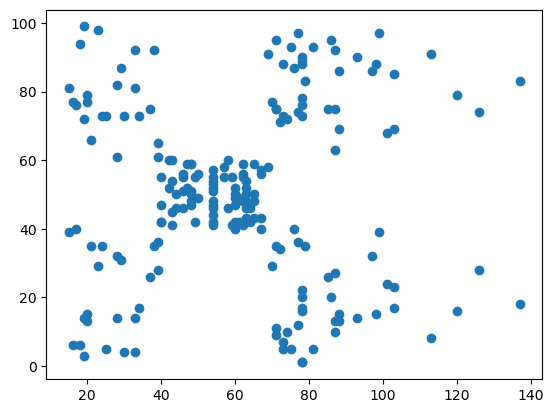

In [11]:
#show this in a graph
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [12]:
#selecting an suitable K value
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

F:\Anacondas\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Anacondas\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anacondas\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Anacondas\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

In [13]:
wcss_error

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25022.48500453035,
 21850.165282585633,
 19641.456216651568]

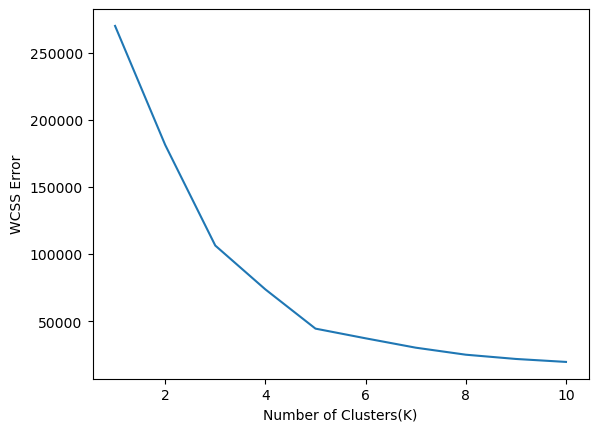

In [15]:
plt.xlabel("Number of Clusters(K)")
plt.ylabel("WCSS Error")
plt.plot(k_values, wcss_error)

In [19]:
#At K=5 the slope difference in big.
#training the model
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)

F:\Anacondas\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Anacondas\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [21]:
data.head(5)

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
data['cluster'] = pred

In [23]:
data.head(5)

,income,score,cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [32]:
#divide the data into clusters
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]
c4 = data[data['cluster']==3]
c5 = data[data['cluster']==4]

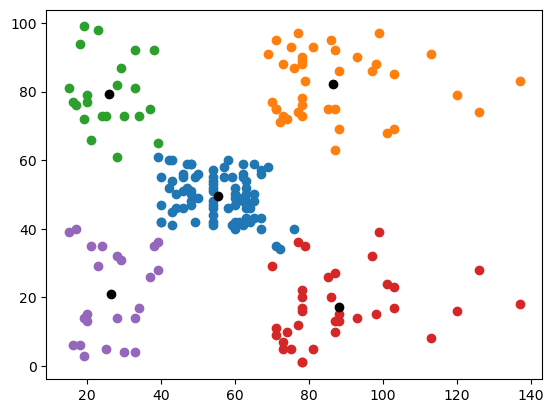

In [44]:
#show all the data in a scatter plot
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='black') #center of each cluster

In [41]:
#centers of each cluster
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])